In [1]:
import silx
from silx.gui.plot import Plot2D, Plot1D,StackView
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LogNorm

02511 - 30 seconds measurement <br>
02512 - single scan


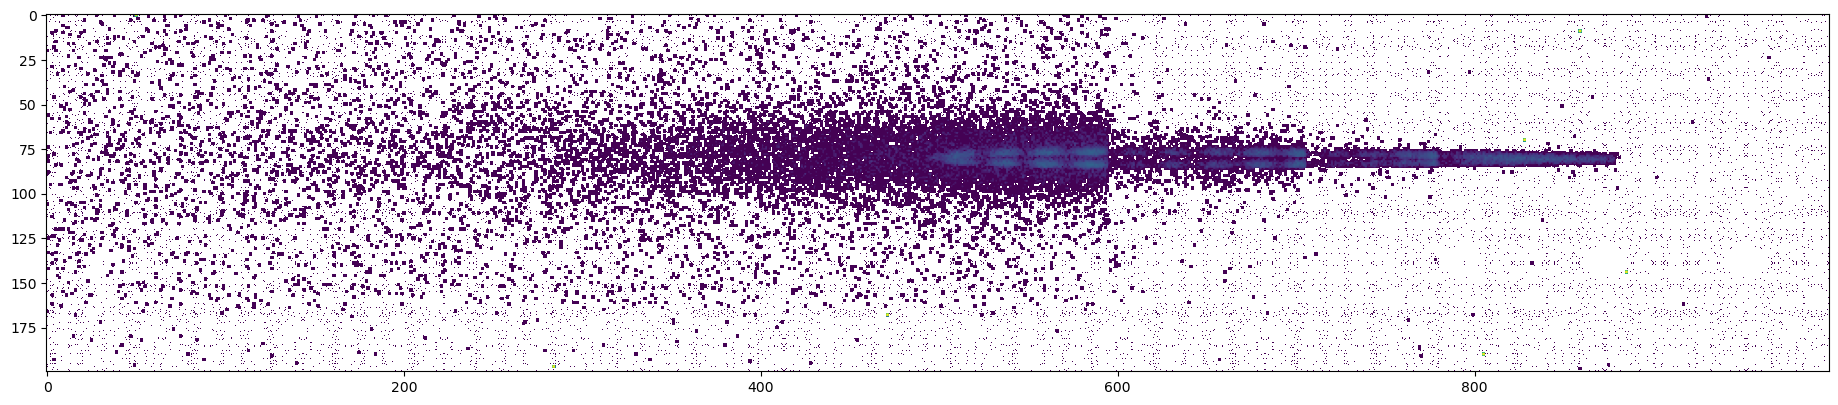

In [2]:
scannumber = "_02512"
specfile = "kowarik_220926"
path_in_file='entry/data/data_000001'
filenumber_in_series = 1

eiger_file = h5py.File(r"scan/"+specfile+scannumber+"/eiger1m/"+specfile+scannumber+"_master.h5")

roi_x1,roi_x2,roi_y1,roi_y2=[0,999,773,787] #[0,999,700,900] 779,790

%matplotlib inline
x=np.arange(roi_x2-roi_x1)

roi_x11,roi_x21,roi_y11,roi_y21=[0,999,700,900]

fig, ax = plt.subplots()
fig.set_size_inches(23, 10.5)
cs = ax.imshow(eiger_file[path_in_file][filenumber_in_series,roi_y11:roi_y21,roi_x11:roi_x21],norm=LogNorm())
plt.show()

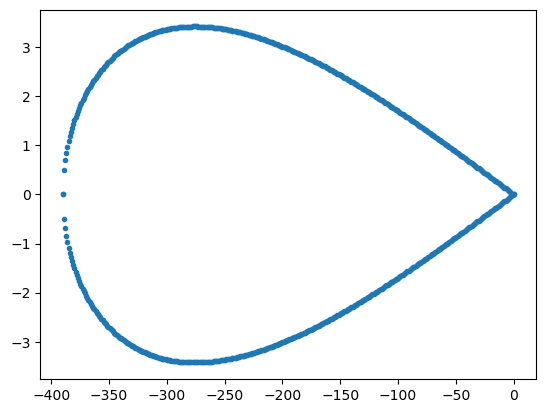

In [3]:
om_max = 1.006

omega1 = np.linspace(0,1.006, num = 387)
omega2 = np.linspace(1.006,0, num = 387)
omega = np.append(omega1,omega2)
#alpha = np.linspace(0,-180, num = 784)
al1 = np.degrees(np.arcsin(omega1/om_max))+90
al2 = np.degrees(np.arcsin(omega2/om_max))+90

alpha = np.append(al1,360-al1[::-1]) 
#print(alpha, omega)
d = 11100  #sample detector distance


k_out_x = 1-(2*np.sin(np.radians(om_max))**2*np.cos(np.radians(alpha))**2)
k_out_y = -np.sin(np.radians(om_max))**2*np.sin(np.radians(2*alpha))
k_out_z = np.sin(np.radians(2*om_max))*np.cos(np.radians(alpha))

beta = np.arcsin(k_out_z)
gamma = np.arcsin(k_out_y)
d_z = np.tan(beta)*d
d_y = np.tan(gamma)*d

plt.plot(d_z,d_y, '.')
plt.show()

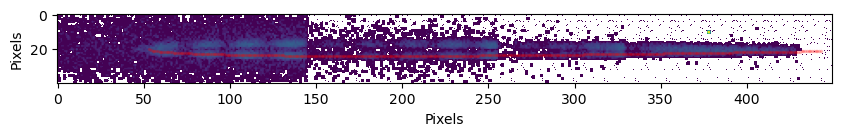

In [4]:
tilt = d_z/392   ###tilt one pixel on the all range

roi_x11,roi_x21,roi_y11,roi_y21=[450,900,760,800]   #[500,892,774,788]
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
from matplotlib.colors import LogNorm
cs = ax.imshow(eiger_file[path_in_file][filenumber_in_series,roi_y11:roi_y21,roi_x11:roi_x21],norm=LogNorm())
ss = ax.plot((d_z[:387])+893-450, d_y[:387]+21.2+tilt[:387], 'r.', markersize=3, alpha = 0.2, label="fit")

plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

z_fce = (d_z)+893-450
y_fce = d_y+21+tilt

y_s = eiger_file[path_in_file][filenumber_in_series,roi_y11:roi_y21,roi_x11:roi_x21]

In [5]:
y_fce_r = np.round(y_fce)
z_fce_r = np.round(z_fce)

y_fce_r = np.array(y_fce_r, dtype=int)
z_fce_r = np.array(z_fce_r, dtype=int)

In [6]:
k = 3
y_selected = []
y_n_selected = []
y_selected_d = []
y_n_selected_d = []
for i in range(774):
    y_m = y_fce_r[i]-k
    y_p = y_fce_r[i]+k
    z_i = z_fce_r[i]
    y=np.sum(y_s[y_m:y_p,z_fce_r[i]], axis=0)
    y_selected = np.append(y_selected,y)
    #direct
    y_d=np.sum(y_s[20:35,z_fce_r[i]], axis=0)
    y_selected_d = np.append(y_selected_d,y_d)

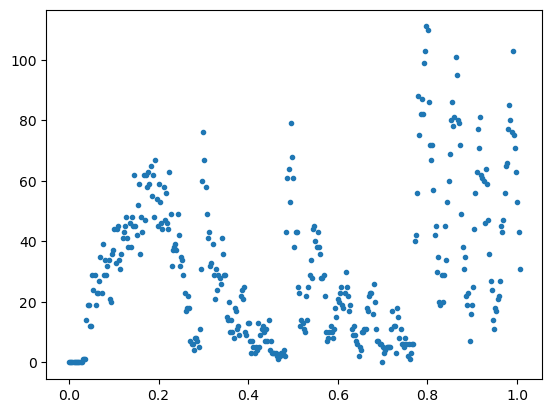

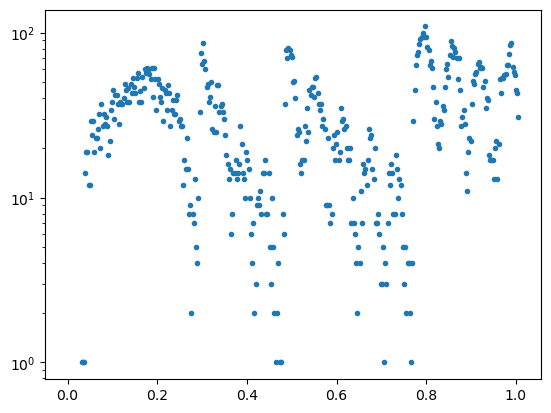

In [7]:
y_selected1 = y_selected[:387]
y_selected2 = y_selected[387:]

plt.plot(omega1,y_selected1, '.')
plt.show()
plt.plot(omega2,y_selected2, '.')
plt.yscale('log')
plt.show()

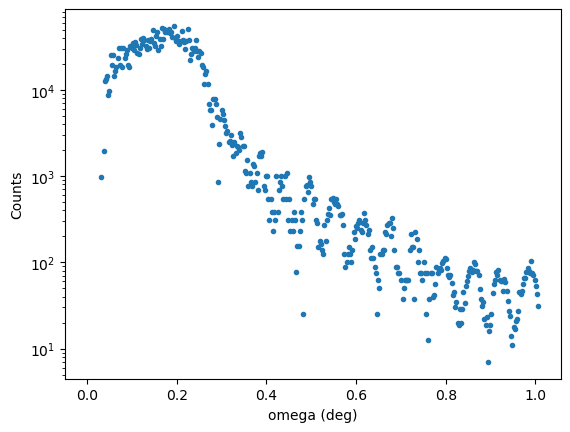

In [8]:
#absorber correction 
y_s1 = np.zeros([387])
for i in range(387):
    if i<=111:    #780
        y_s1[i]=y_selected_d[i]*1934/2
    if i>111 and i<=184:
        y_s1[i]=y_selected_d[i]*153.46/2
    if i>184 and i<=295:
        y_s1[i]=y_selected1[i]*12.47
    if i>295:
        y_s1[i]=y_selected1[i]

plt.plot(omega1,y_s1, '.')
plt.xlabel('omega (deg)')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

Mapping of the detector

y = -0.00258 * x + 2.30232
[8.650e+02 7.062e-02] [505.        0.99942]
11090.82191442173


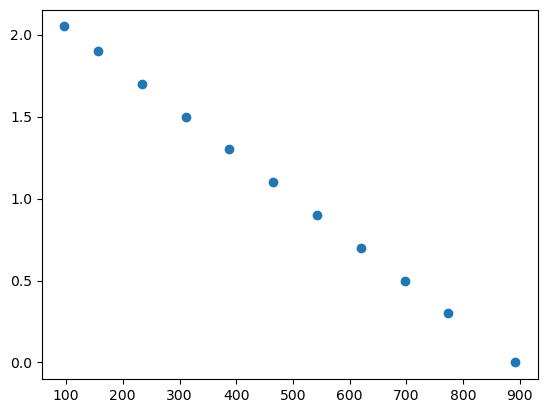

In [9]:

from scipy.optimize import curve_fit
#eiger angular range
om = [0, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.05]
xx = [892, 773, 697, 620, 543, 465, 388, 311, 233, 156, 97]

# objective function lin fit
def objective(x, a, b):
	return a * x + b

popt, _ = curve_fit(objective, xx, om)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
plt.scatter(xx, om)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(xx), max(xx), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)

yf = -0.00258 * x + 2.30232 #om to pixel fit
pix_om = np.array([x,yf])
print(pix_om[:,865], pix_om[:,505])

#distance from calibration
d_c = 795/np.tan(np.radians(2*2.05))
print(d_c)

Foot Print Correction

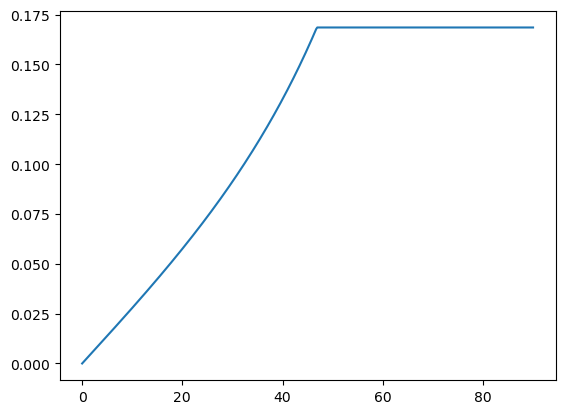

C:\Users\marec\AppData\Local\Temp\ipykernel_18600\2424137982.py:19: RuntimeWarning: divide by zero encountered in divide
  active_beam = beamsize/active_s


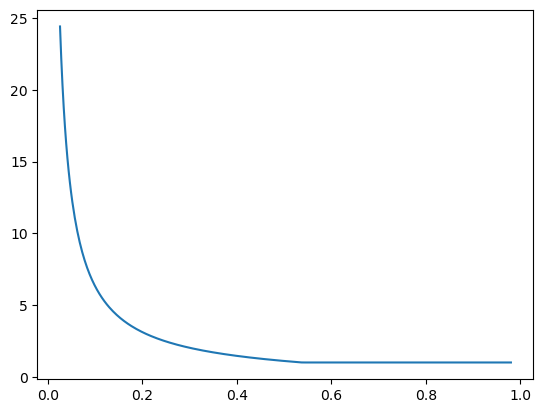

In [10]:
alf_f = al1-90
#regtangle
a = 4.8
b = 4.5
fp = np.linspace(0,387,387)
for i in range(387):
    if alf_f[i] >= np.degrees(np.arctan(a/b)):
        fp[i] = a/np.cos(np.radians(alf_f[i]-90))
    else:
        fp[i] = b/np.cos(np.radians(alf_f[i]))

active_s = np.sin(np.radians(omega1))*fp*2

plt.plot(alf_f, active_s)
plt.show()

beamsize = 0.1

active_beam = beamsize/active_s
for i in range(387):
    if active_beam[i] <= 1:
        active_beam[i] = 1

#####################################################################
foot_correction = np.array([omega1, al1, active_beam])
#####################################################################
plt.plot(foot_correction[0,10:-10], foot_correction[2,10:-10])
plt.show()



C:\Users\marec\AppData\Local\Temp\ipykernel_18600\2090439827.py:2: RuntimeWarning: invalid value encountered in multiply
  y_corrected = y_s1*foot_correction[2,:]


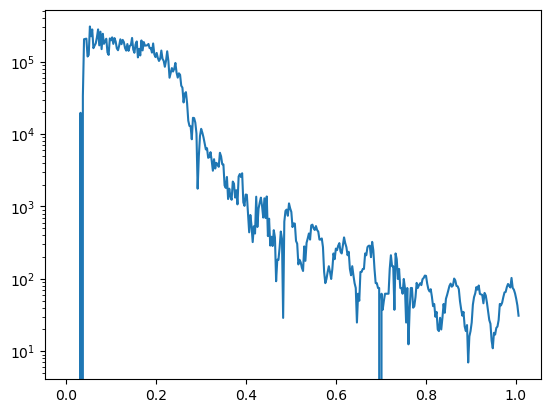

In [11]:
#FOOT PRINT CORRECTION
y_corrected = y_s1*foot_correction[2,:]

plt.plot(foot_correction[0,:],y_corrected)
plt.yscale('log')
plt.show()


In [12]:
k_out_y_d = -np.sin(np.radians(om_max))**2*2*np.cos(np.radians(2*al1))
k_out_z_d = -np.sin(np.radians(2*om_max))*np.sin(np.radians(al1))

beta_d = np.arcsin(k_out_z_d)
gamma_d = np.arcsin(k_out_y_d)
d_z_d = np.tan(beta_d)*d
d_y_d = np.tan(gamma_d)*d

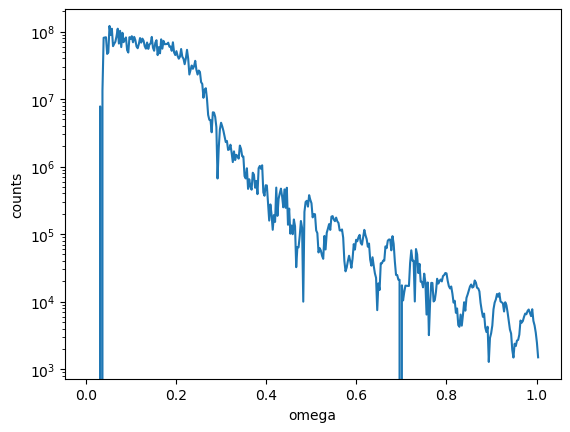

In [13]:
#Movement normalization
'''
k_out_x = 1-(2*np.sin(np.radians(om_max))**2*np.cos(np.radians(alpha))**2)
k_out_y = -np.sin(np.radians(om_max))**2*np.sin(np.radians(2*alpha))   der_y = -2*np.cos(2α)*sin^2(om_max)
k_out_z = np.sin(np.radians(2*om_max))*np.cos(np.radians(alpha))   der_z = -np.sin(2*om) sin(α)
'''

g_cor = (y_corrected*(abs(d_z_d)+abs(d_y_d)))

plt.plot(omega1[:-1],g_cor[:-1])
plt.yscale('log')
plt.xlabel('omega')
plt.ylabel('counts')
plt.show()


In [14]:
g_cor_n = (g_cor[1:-1]-min(g_cor[35:-1]))/(max(g_cor[70:-1])-min(g_cor[35:-1]))
g_cor_nn = np.delete(g_cor_n,[111,112,113,183,184,185,186,294,295,296],0)

omega1_n = np.delete(omega1,[112,113,114,184,185,186,187,295,296,297],0)

389.0
(389, 2)


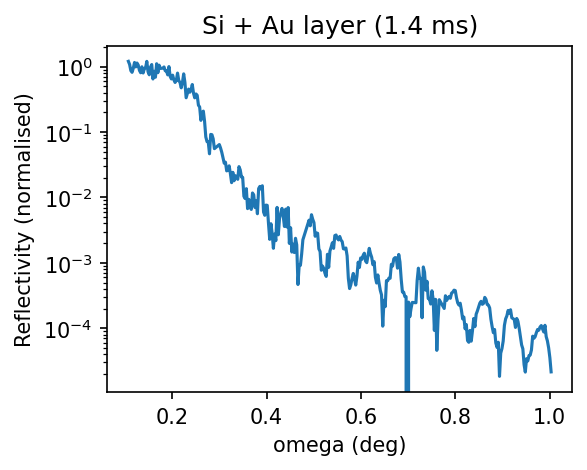

In [15]:
ref_Au = np.loadtxt("reference/Au_ref_done_n.txt")
off_set = 0.00 #q-offset

data = []

for i in range(len(ref_Au)-1):
    if ref_Au[i,0]!=ref_Au[i+1,0]:
        data=np.append(data, ref_Au[i,:])
        
print(len(data)/2)
data = np.reshape(data, [389,2])
print(data.shape)
    
beam = 0.1
sample = 10

F = beam/(sample*np.sin(np.radians(data[:,0])))
for i in range(389):
    if F[i]<1:
        F[i]=1

R_cor = data[:,1] * F

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(omega1_n[41:-1]+off_set,g_cor_nn[40:])
plt.yscale('log')
plt.xlabel('omega (deg)')
plt.ylabel('Reflectivity (normalised)')
plt.title('Si + Au layer (1.4 ms)')
plt.show()


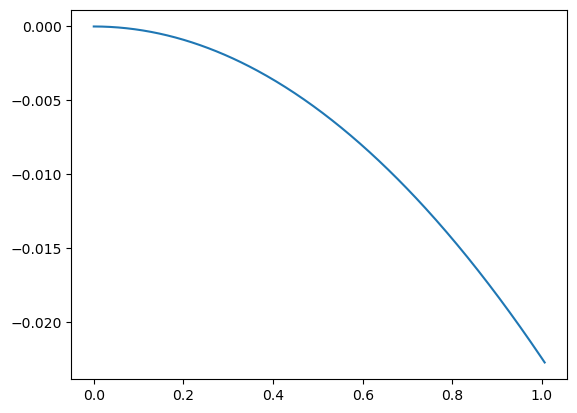

In [16]:
###detector tilt
delta = 0.19
v = np.tan(np.radians(omega1))*np.sin(np.radians(delta))*d_z[:387]/(1+np.tan(np.radians(omega1))*np.sin(np.radians(delta)))
plt.plot(omega1, v)
plt.show()
v_n = np.delete(v,[111,112,113,114,184, 185,186,295,296,297],0)

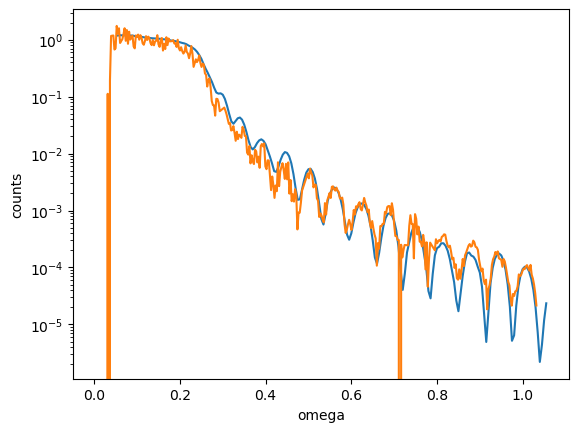

In [17]:
off_set = 0.00   #q-offset
plt.plot(ref_Au[:250,0], ref_Au[:250,1]*1.2)
plt.plot(omega1_n[1:-1]*om_max-v_n[1:-1]+off_set,g_cor_nn)
plt.yscale('log')
plt.xlabel('omega')
plt.ylabel('counts')
plt.show()